<a href="https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/main/Modulo%205%20-%20Deep%20Leaning/code/DL_04_Regularizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Load MNIST data set and format it

In [ ]:
# Usaremos la base de datos MNIST
# Esta base de datos contiene imágenes binarias de dígitos escritos a mano.
# Usaremos las imágenes extendidas en forma de vector como datos 'x' y sus
# respectivas etiquetas (enteros) como valores de salida 'y'.

# El objetivo es diseñar redes neuronales que, con ayuda de regularizadores,
# sean capaces de obtener buen desempeño de clasificación multi-clase, tanto
# en los datos de entrenamiento como en los de validación y prueba.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load data set
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Shapes")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Shapes
x_train: (60000, 28, 28)
x_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


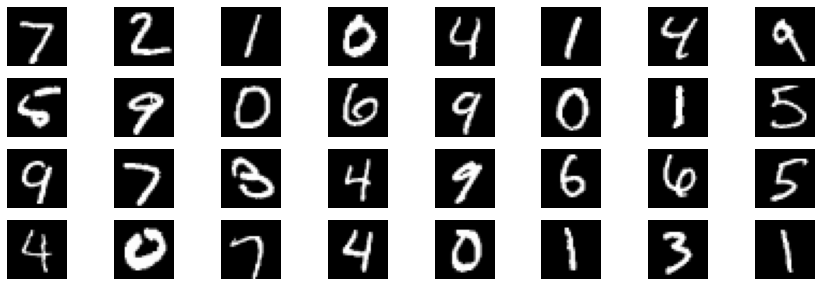

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1]


In [ ]:
# Visualize a few examples
plt.figure(figsize=(15, 5))
for ind in range(32):
    plt.subplot(4, 8, ind+1)
    plt.imshow(x_test[ind], cmap='gray')
    plt.axis('off')
plt.show()

print(y_test[:32])

In [ ]:
# Put images into a vector format
x_train = np.reshape(x_train, (len(x_train), -1)).astype('float32') # tf requires float32 or float64
x_test  = np.reshape(x_test,  (len(x_test),  -1)).astype('float32')

print("X shapes")
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

X shapes
x_train: (60000, 784)
x_test: (10000, 784)


In [ ]:
# Put categorical data into one-hot encoding format
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Y shapes")
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print(y_test[:10])

Y shapes
y_train: (60000, 10)
y_test: (10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Part 2: Create DNN model and train it

In [ ]:
# tensorflow imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2

In [ ]:
# == - ==
# La celda siguiente contiene dos modelos de redes neuronales. Comenta uno y usa otro.
# Evalua uno a la vez y reporta tus resultados.
#
# Nota que importamos layers tipo BatchNorm y Dropout, los cuales son usados en 
# distintas secciones del modelo.
# También importamos regularizadores l1 y l2, los cuales son usados como parametros
# de las capas.
#
# Nota también el uso del parametro "metrics" en la compilación del modelo.
# Este parámetro es sólo informativo, pero no se usa para optimizar el modelo.
# En el caso particular de este modelo, se indica la exactitud de la clasificación,
# sin embargo la minimización del error se hace con la función de pérdida "categorical_crossentropy"
# Puedes revisar más detalles en la documentación de Keras o tf.
#
# Q1: Según los resultados que hayas obtenido, ¿cuál de los dos modelos es preferible y por qué?
# Q2: ¿Por qué usamos softmax en la salida de la red?
# Q3: Ajusta el primer modelo (sin regularizadores) para obtener una pérdida de "entrenamiento"
#     menor o igual a 0.08 y exactitud mayor o igual a 98%.
#     Reporta el número de capas y sus tamaños.
# Q4: Ahora usa esos mismos valores de hiperparámetros (número de capas y sus tamaños)
#     en el segundo modelo, y ajusta la taza de dropout, y las alfas en los regularizadores l1 y l2
#     para disminuir el error de generalización (validación).
#     Reporta el modelo regularizado que te haya dado mejores resultados.
# Q5: Partiendo del mejor modelo que hayas obtenido anteriormente, modifica
#     el número de sus capas y tamaños para disminuir aún más los errores, tanto
#     el de entrenamiento como el de validación.
#     Reporta tu mejor modelo.
# =======

In [ ]:
# Create a Deep Network
DNN = Sequential()

# -- Try 01 --
#DNN.add(InputLayer(input_shape=x_train.shape[1:]))
#DNN.add(Dense(256, activation='relu'))
#DNN.add(Dense(64, activation='relu'))
#DNN.add(Dense(16, activation='relu'))
# -- ------ --

# -- Try 02 --
DNN.add(InputLayer(input_shape=x_train.shape[1:]))
DNN.add(Dropout(rate=0.2))
DNN.add(Dense(512))
DNN.add(BatchNormalization())
DNN.add(Activation('relu'))
DNN.add(Dense(512, activation='relu', activity_regularizer=l1(l=3e-4)))
DNN.add(Dense(512, activation='relu', activity_regularizer=l2(l=3e-5)))
# -- ------ --

DNN.add(Dense(units=y_train.shape[1], activation='softmax'))
DNN.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_10 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
activation_11 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_68 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_69 (Dense)             (None, 10)              

In [ ]:
# Define training parameters
# Esta es la manera en que puedes modificar los optimizadores que uses.
# Revisa la documentación de keras para más opciones.
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.6, decay=0.97, nesterov=True)
DNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'mse', 'categorical_crossentropy'])
# Nota que el optimizador es igualado a sgd y no a 'sgd' (no hay comillas).
# Es decir, se igualó a una variable y no a una cadena de texto constante.

In [ ]:
# Train model
history = DNN.fit(x=x_train, y=y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.1, shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 5s 88us/step - loss: 0.6477 - acc: 0.8796 - val_loss: 0.2774 - val_acc: 0.9628
Epoch 2/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.2640 - acc: 0.9564 - val_loss: 0.2001 - val_acc: 0.9713
Epoch 3/50
54000/54000 [==============================] - 3s 53us/step - loss: 0.2117 - acc: 0.9642 - val_loss: 0.1686 - val_acc: 0.9753
Epoch 4/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.1843 - acc: 0.9686 - val_loss: 0.1563 - val_acc: 0.9780
Epoch 5/50
54000/54000 [==============================] - 3s 53us/step - loss: 0.1630 - acc: 0.9726 - val_loss: 0.1458 - val_acc: 0.9802
Epoch 6/50
54000/54000 [==============================] - 3s 54us/step - loss: 0.1461 - acc: 0.9758 - val_loss: 0.1431 - val_acc: 0.9788
Epoch 7/50
54000/54000 [==============================] - 3s 54us/step - loss: 0.1385 - acc: 0.9773 - val_loss: 0.1245 - val_acc:

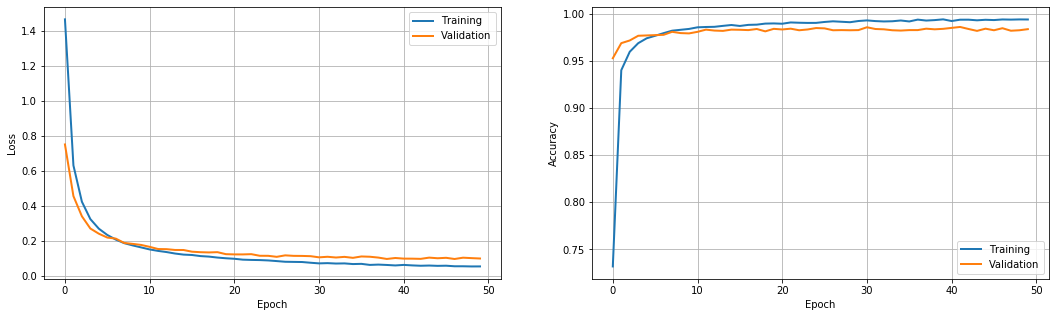

In [ ]:
# Plot loss
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(DNN.history.history['acc'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_acc'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [ ]:
# Save model to disk, and load it back
from tensorflow.keras.models import load_model
DNN.save("mymodel.h5")
DNN = load_model("mymodel.h5")

In [ ]:
# Compute test loss
test_loss, test_acc = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss:", test_loss)
print("Test acc:", test_acc)

Test loss: 0.07634117979221046
Test acc: 0.9819


In [ ]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)
print(y_test[:10])

(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# Back to categorical labels
y_test_hat_cat = np.argmax(y_test_hat, axis=1)
y_test_cat = np.argmax(y_test, axis=1)

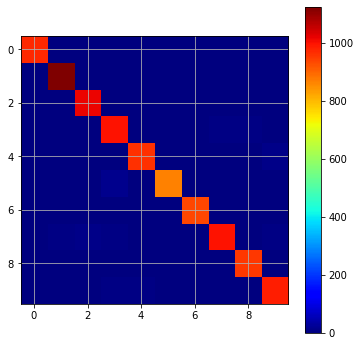

In [ ]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test_cat, y_test_hat_cat)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()